## Name: 張宸愷
## ID: 0710018

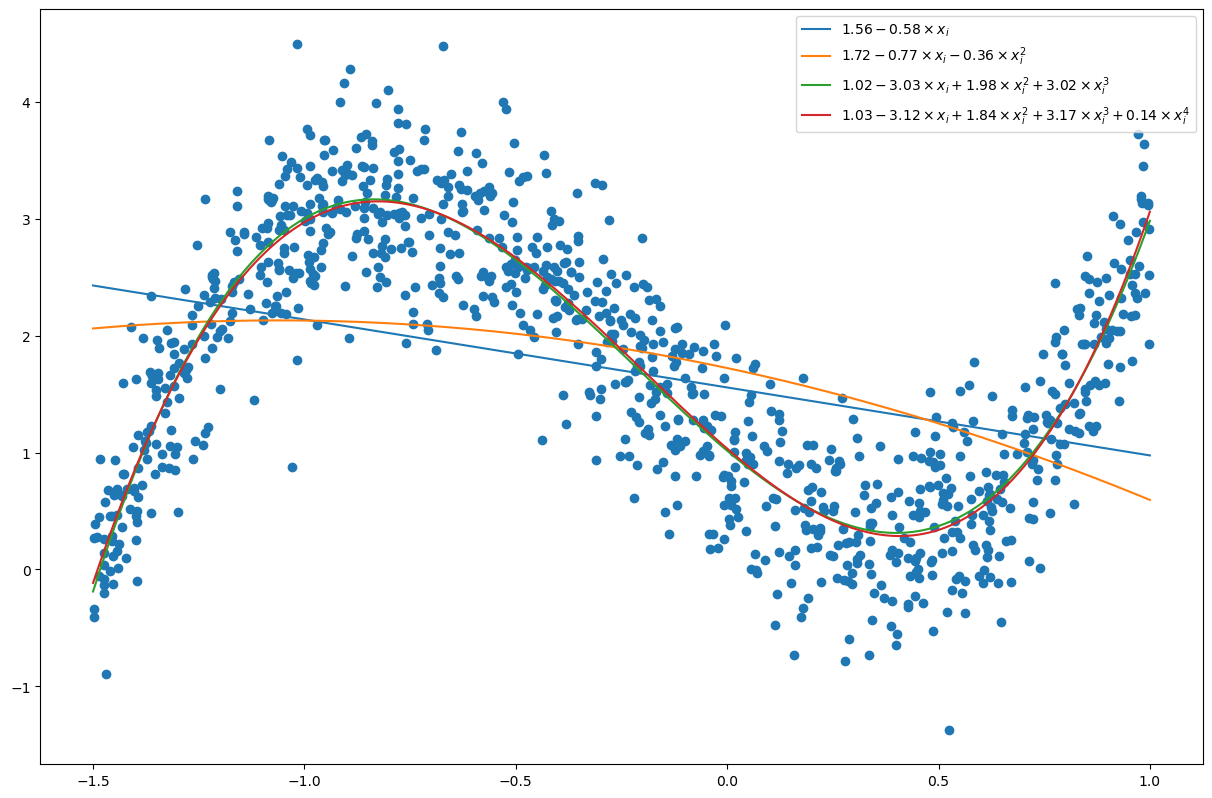

In [67]:
# Linear regression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# data generation
Xs = np.random.uniform(-1.5, 1, size=1000)
noise = np.random.normal(0, 0.5, size=Xs.shape)
Ys = 3 * Xs**3 + 2 * Xs**2 - 3 * Xs + 1 + noise

f = plt.figure(figsize=(15, 10), dpi=100)
_ = plt.scatter(Xs, Ys) # scatter plot the uniform x and y with noise

for k in range(1, 5):
    pof = PolynomialFeatures(degree=k)

    trans = pof.fit_transform(np.expand_dims(Xs, axis=1)) # get the powers of x_i
    # print(trans)

    lr = LinearRegression()
    lr.fit(trans, Ys)

    coef = lr.coef_.T
    coef[0] = lr.intercept_ # replace the intercept in coef

    line = np.expand_dims(np.linspace(-1.5, 1, 1000), axis=1)
    trans = pof.fit_transform(line) # get the powers of linspace x for plotting the lines
    # print(coef)
    y = np.matmul(trans, coef) # get the y used for plotting
    lab = "${:.2f}".format(coef[0]) # latex magic start
    for i in range(1, k+1):
        c = coef[i]
        lab += ("+" if c >= 0 else "") + "{:.2f} \\times ".format(c) + ("x_i" if i==1 else "x^{}_i".format(i)) # some latex magic
    # print(y)
    lab += "$" # the magic latex end
    _ = plt.plot(line, y, label=lab)
_ = plt.legend() # show legend



Model weight:


<IPython.core.display.Math object>

Accuracy: 0.987


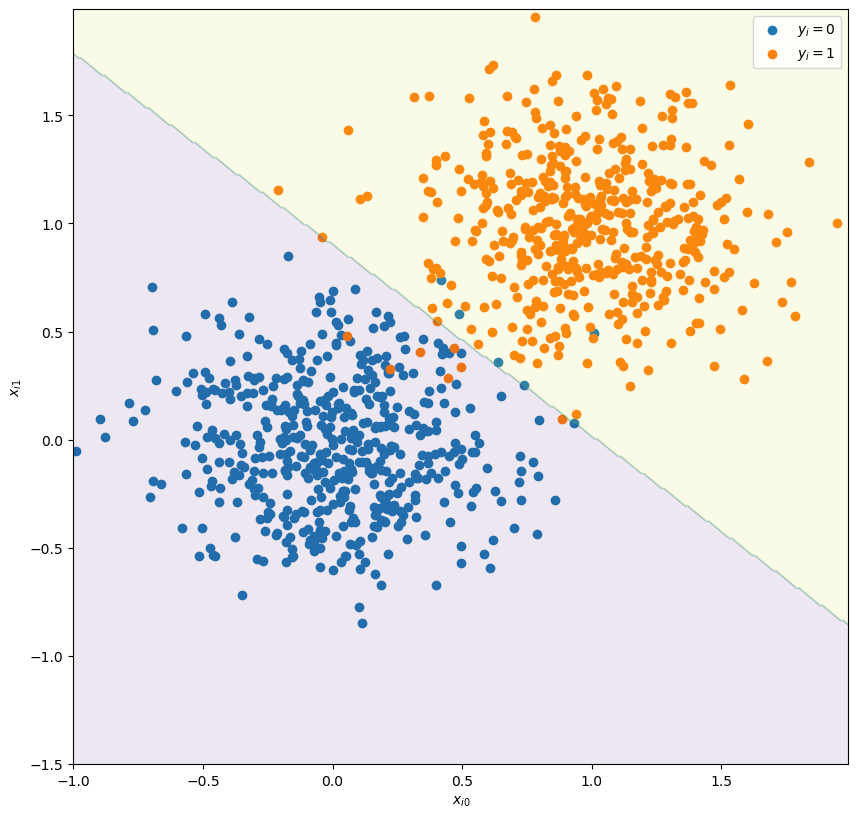

In [142]:
# logistic regression

import numpy as np
from matplotlib import pyplot as pyplot
from sklearn.linear_model import LogisticRegression
import math
from IPython.display import Math, display
from sklearn.metrics import classification_report

Ys = np.random.randint(0, 2, size=1000)  # get binary class
# print(Ys)
Xs = np.zeros((1000, 2), dtype=np.float64)
Xs[:, 0] = np.random.normal(scale=math.sqrt(
    0.1), size=Xs.shape[0])  # get X_i0 centered on 0
Xs[:, 1] = np.random.normal(scale=math.sqrt(
    0.1), size=Xs.shape[0])  # get X_i1 centered on 0

Xs = Xs + np.expand_dims(Ys, axis=1)  # get true X_i with y offset
# print(Xs)

lreg = LogisticRegression()
lreg.fit(Xs, Ys)
coef = lreg.coef_
# coef[0] = lreg.intercept_

print("Model weight:")
display(Math("y_i = L({:.4f}{}\\times x_{{i0}} {} \\times x_{{i1}})".format(
    float(lreg.intercept_),
    ("+{:.4f}" if coef[0, 0] > 0 else "{:.4f}").format(
        float(coef[0, 0])),
    ("+{:.4f}" if coef[0, 1] > 0 else "{:.4f}").format(float(coef[0, 1])))))

y_pred = lreg.predict(Xs)
r = classification_report(Ys, y_pred, output_dict=True) # report accuracy
print("Accuracy: {}".format(r["accuracy"]))
# print(y_pred)
# y_pred = 1/(1+np.exp(-(lreg.intercept_ + Xs[:,0] * coef[0,0] + Xs[:,1] * coef[0,1])))
# print(y_pred)

_ = plt.figure(figsize=(10, 10), dpi=100)
ones = np.argwhere(Ys == 1) # get index with y_i = 1
zeros = np.argwhere(Ys == 0) # get index with y_i = 0
_ = plt.scatter(Xs[zeros, 0], Xs[zeros, 1], label="$y_i=0$")
_ = plt.scatter(Xs[ones, 0], Xs[ones, 1], label="$y_i=1$")

xx, yy = np.meshgrid(np.arange(-1, 2, 0.01),
                     np.arange(-1.5, 2, 0.01))  # create meshgrid
Z = lreg.predict(np.c_[xx.ravel(), yy.ravel()])  # sample prediction alone the grid
Z = Z.reshape(xx.shape) 
plt.contourf(xx, yy, Z, alpha=0.1)  # plot boundary


plt.xlabel("$x_{{i0}}$")
plt.ylabel("$x_{{i1}}$")
_ = plt.legend()
